# TIme Series forecasting using LSTM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
df = pd.read_csv("pollution.csv",index_col="No")
df.head(10)

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [6]:
df.shape[0]/(24*365)

5.002739726027397

In [15]:
import datetime
dt = datetime.datetime.strptime("2010 1 1 1","%Y %m %d %H")
print(dt)

2010-01-01 01:00:00


In [18]:
df.iloc[1,:]

year     2010
month       1
day         1
hour        1
pm2.5     NaN
DEWP      -21
TEMP      -12
PRES     1020
cbwd       NW
Iws      4.92
Is          0
Ir          0
Name: 2, dtype: object

In [27]:
def clean_dates(ps):
    string = str(ps['year']) + " " + str(ps["month"]) + " " + str(ps['day']) + " " + str(ps['hour'])
    return datetime.datetime.strptime(string,"%Y %m %d %H")
df['date'] = df.T.apply(clean_dates)

In [28]:
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,date
No,,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [29]:
df.index = df['date']
df.drop(['year','month','day','hour','date'],axis=1,inplace=True)
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [30]:
df.columns = ['pollution','dew','temperature','pressure','wind_direction','wind_speed',
             'snow','rain']
df.head()

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [31]:
df.isnull().sum()

pollution         2067
dew                  0
temperature          0
pressure             0
wind_direction       0
wind_speed           0
snow                 0
rain                 0
dtype: int64

In [35]:
df.head(50)

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
2010-01-01 05:00:00,NaN,-19,-10.0,1017.0,NW,16.10,0,0
2010-01-01 06:00:00,NaN,-19,-9.0,1017.0,NW,19.23,0,0
2010-01-01 07:00:00,NaN,-19,-9.0,1017.0,NW,21.02,0,0
2010-01-01 08:00:00,NaN,-19,-9.0,1017.0,NW,24.15,0,0


In [36]:
df.shape

(43824, 8)

In [37]:
df = df[24:]
df.shape

(43800, 8)

In [38]:
df['pollution'].fillna(0,inplace=True)

In [39]:
df.head()

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [40]:
# data format for LSTM time series = (samples, timestamps, features)

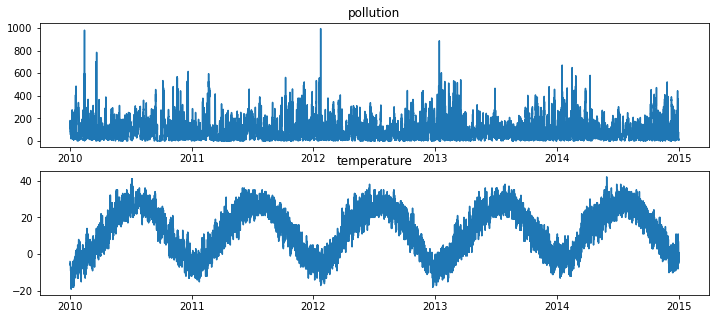

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(df['pollution'])
plt.title("pollution")
plt.subplot(212)
plt.plot(df['temperature'])
plt.title("temperature")
plt.show()

In [43]:
df.head()

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [44]:
df['wind_direction'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wind_direction'] = le.fit_transform(df['wind_direction'])
df.head()

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,2,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,2,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,2,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,2,6.25,2,0


In [48]:
# data format for LSTM time series = (samples, timestamps, features)
df.shift(1)

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02 01:00:00,129.0,-16.0,-4.0,1020.0,2.0,1.79,0.0,0.0
2010-01-02 02:00:00,148.0,-15.0,-4.0,1020.0,2.0,2.68,0.0,0.0
2010-01-02 03:00:00,159.0,-11.0,-5.0,1021.0,2.0,3.57,0.0,0.0
2010-01-02 04:00:00,181.0,-7.0,-5.0,1022.0,2.0,5.36,1.0,0.0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,10.0,-22.0,-2.0,1033.0,1.0,226.16,0.0,0.0
2014-12-31 20:00:00,8.0,-23.0,-2.0,1034.0,1.0,231.97,0.0,0.0
2014-12-31 21:00:00,10.0,-22.0,-3.0,1034.0,1.0,237.78,0.0,0.0


In [49]:
df2 = df.shift(1)
df2['pollution'] = df['pollution']
df2.head()

,pollution,dew,temperature,pressure,wind_direction,wind_speed,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02 01:00:00,148.0,-16.0,-4.0,1020.0,2.0,1.79,0.0,0.0
2010-01-02 02:00:00,159.0,-15.0,-4.0,1020.0,2.0,2.68,0.0,0.0
2010-01-02 03:00:00,181.0,-11.0,-5.0,1021.0,2.0,3.57,0.0,0.0
2010-01-02 04:00:00,138.0,-7.0,-5.0,1022.0,2.0,5.36,1.0,0.0


In [50]:
df2.rename(columns={"pollution":"Pollution (t)"},inplace=True)
df2.rename(columns={"dew":"dew (t-1)","temperature":"temperature (t-1)",
                    "pressure":"pressure (t-1)","wind_direction":"wind_direction (t-1)",
                    "wind_speed":"wind_speed (t-1)","snow":"snow (t-1)","rain":"rain (t-1)"},
          inplace=True)

In [51]:
print(df2.shape)
df2.dropna(inplace=True)
print(df2.shape)

(43800, 8)
(43799, 8)


In [53]:
df2.head()

,Pollution (t),dew (t-1),temperature (t-1),pressure (t-1),wind_direction (t-1),wind_speed (t-1),snow (t-1),rain (t-1)
date,,,,,,,,
2010-01-02 01:00:00,148.0,-16.0,-4.0,1020.0,2.0,1.79,0.0,0.0
2010-01-02 02:00:00,159.0,-15.0,-4.0,1020.0,2.0,2.68,0.0,0.0
2010-01-02 03:00:00,181.0,-11.0,-5.0,1021.0,2.0,3.57,0.0,0.0
2010-01-02 04:00:00,138.0,-7.0,-5.0,1022.0,2.0,5.36,1.0,0.0
2010-01-02 05:00:00,109.0,-7.0,-5.0,1022.0,2.0,6.25,2.0,0.0


In [56]:
train = df2.iloc[:3*24*365,:].values
test = df2.iloc[3*24*365:,:].values

xtrain = train[:,1:]
ytrain = train[:,0]
xtest = test[:,1:]
ytest = test[:,0]
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(26280, 7)
(17519, 7)
(26280,)
(17519,)


In [58]:
# data format for LSTM time series = (samples, timestamps, features)
xtrain = xtrain.reshape(xtrain.shape[0],1,7)
xtest = xtest.reshape(xtest.shape[0],1,7)
print(xtrain.shape)
print(xtest.shape)

(26280, 1, 7)
(17519, 1, 7)


## Modelling

In [59]:
from tensorflow.keras import models,layers

In [62]:
input_layer = layers.Input(shape=(1,7))
lstm_layer = layers.LSTM(64,activation='tanh')(input_layer)
output_layer = layers.Dense(1)(lstm_layer)
model = models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1, 7)]            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                18432     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 18,497
Trainable params: 18,497
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='mae',optimizer='adam')
model.fit(xtrain,ytrain,epochs=50,batch_size=64,validation_data=(xtest,ytest),shuffle=False)

Train on 26280 samples, validate on 17519 samples
Epoch 1/50
26280/26280 [==============================] - 4s 147us/sample - loss: 86.9262 - val_loss: 90.4263
Epoch 2/50
26280/26280 [==============================] - 2s 58us/sample - loss: 81.2032 - val_loss: 85.2671
Epoch 3/50
26280/26280 [==============================] - 1s 55us/sample - loss: 77.3502 - val_loss: 81.6080
Epoch 4/50
26280/26280 [==============================] - 1s 56us/sample - loss: 74.6224 - val_loss: 79.1583
Epoch 5/50
26280/26280 [==============================] - 2s 62us/sample - loss: 72.9880 - val_loss: 76.9693
Epoch 6/50
26280/26280 [==============================] - 2s 58us/sample - loss: 71.3346 - val_loss: 75.0839
Epoch 7/50
26280/26280 [==============================] - 1s 56us/sample - loss: 70.0012 - val_loss: 73.4633
Epoch 8/50
26280/26280 [==============================] - 2s 65us/sample - loss: 68.8518 - val_loss: 72.1665
Epoch 9/50
26280/26280 [==============================] - 2s 62us/sample - lo

In [64]:
ypred = model.predict(xtest)
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ypred)

9870.922498941238